## Problem Set #[1]

MACS 30250, Dr. Evans

Linghui Wu

In [1]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

from scipy.stats import gaussian_kde

### Problem 1

**(a)**

In [2]:
# Load the dataset
covid = pd.read_csv("data/COVIDincubation.txt")
covid.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


In [3]:
# Summary statistics
covid.describe()

,age,symp_days
count,57.000000,59.000000
mean,42.894737,5.838983
std,13.201304,2.933811
min,10.000000,2.500000
25%,33.000000,4.000000
50%,41.000000,5.000000
75%,50.000000,7.000000
max,70.000000,15.000000


<IPython.core.display.Javascript object>


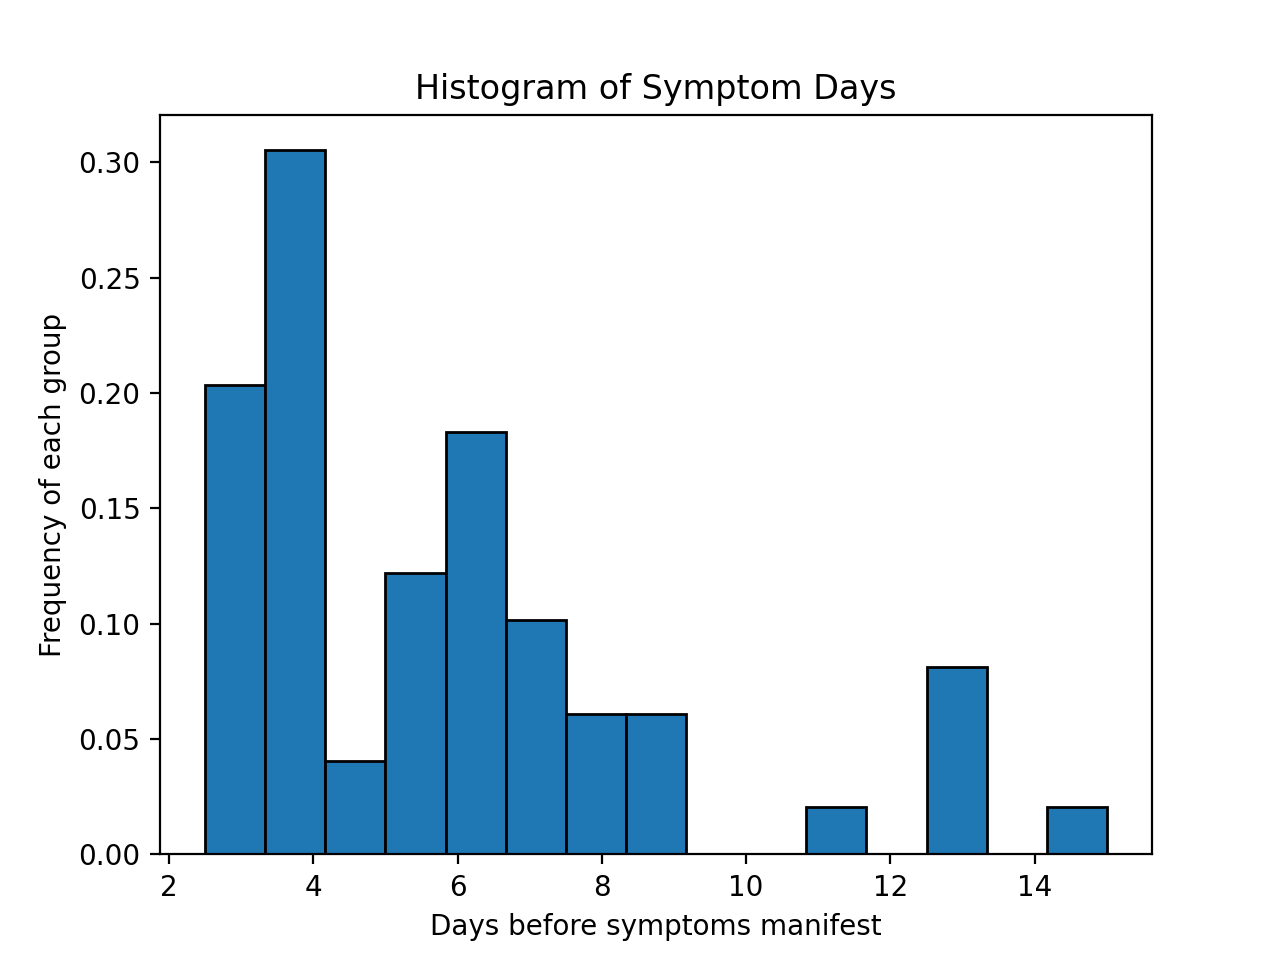

In [4]:
# Overall histogram
symp_days_all = covid["symp_days"].values
fig = plt.figure()
plt.hist(symp_days_all, bins=15, density=True, edgecolor='black')
plt.xlabel("Days before symptoms manifest")
plt.ylabel("Frequency of each group")
plt.title("Histogram of Symptom Days")
plt.show();

<IPython.core.display.Javascript object>


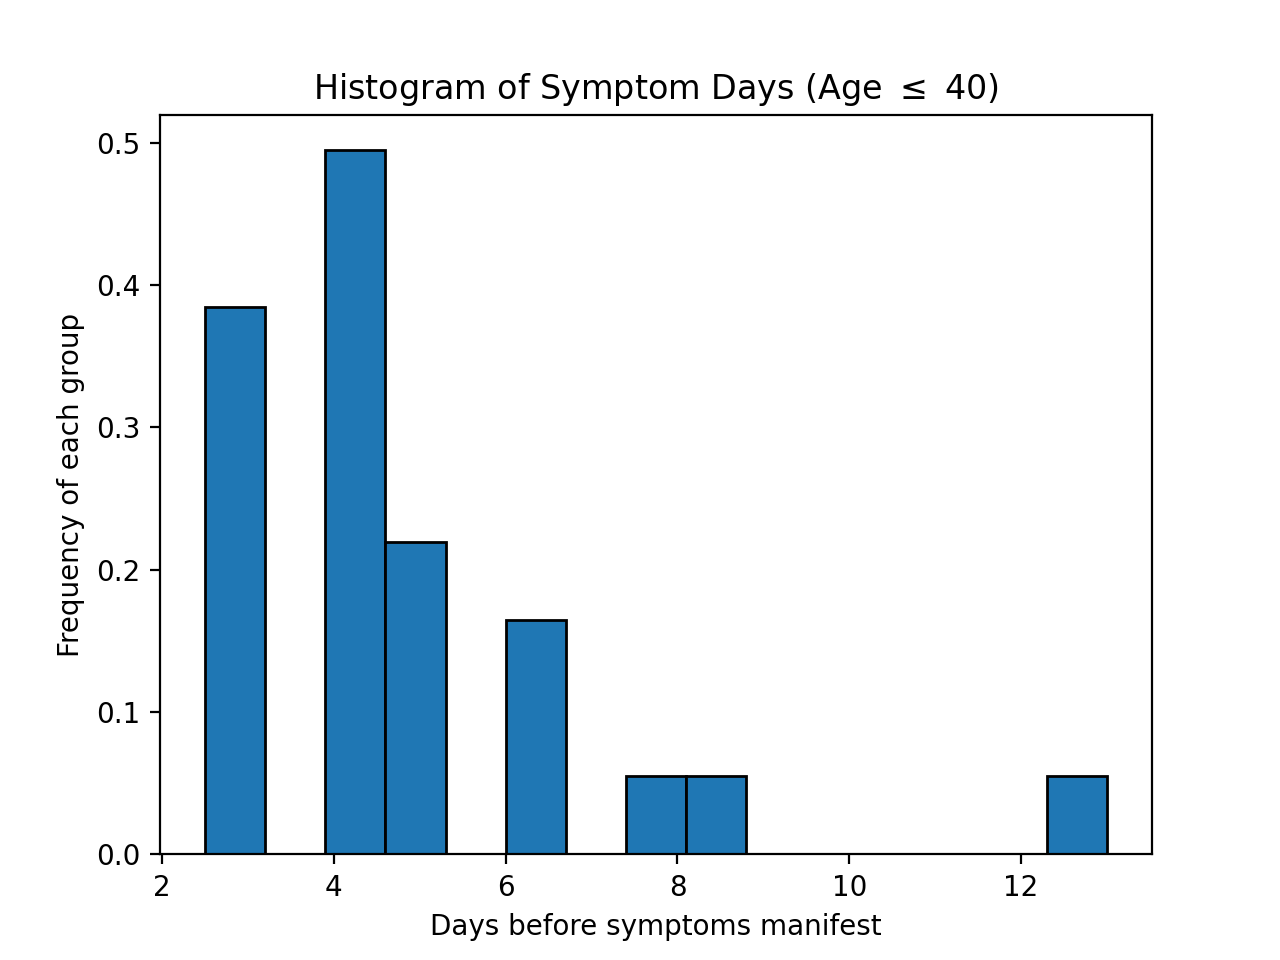

In [5]:
# Age <= 40 histogram
symp_days_young = covid.loc[covid["age"] <= 40]["symp_days"]
fig = plt.figure()
plt.hist(symp_days_young, bins=15, density=True, edgecolor='black')
plt.xlabel("Days before symptoms manifest")
plt.ylabel("Frequency of each group")
plt.title(r"Histogram of Symptom Days (Age $\leq$ 40)")
plt.show();

<IPython.core.display.Javascript object>


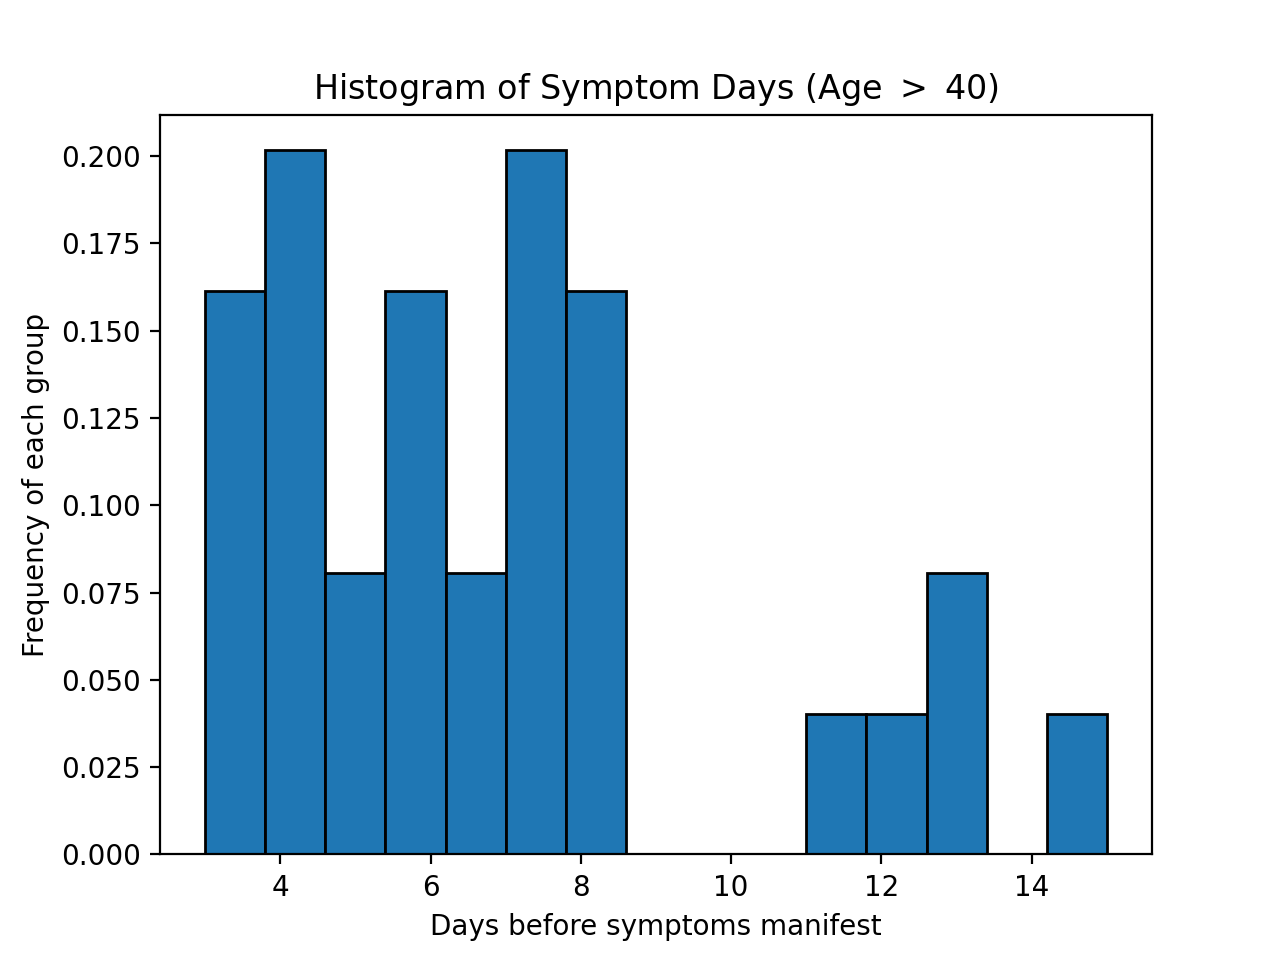

In [6]:
# Age > 40 histogram
symp_days_old = covid.loc[covid["age"] > 40]["symp_days"]
fig = plt.figure()
plt.hist(symp_days_old, bins=15, density=True, edgecolor='black')
plt.xlabel("Days before symptoms manifest")
plt.ylabel("Frequency of each group")
plt.title(r"Histogram of Symptom Days (Age $>$ 40)")
plt.show();

**(b)**

In [7]:
# Choose an optimal bandwidth for the overall sample
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid_all = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=LeaveOneOut()
)
grid_all.fit(symp_days_all[:, None])
opt_all = grid_all.best_params_['bandwidth']
print("The optimal bandwidths for KDE of all the sample is {}.".format(opt_all))

# Instantiate and fit the overall sample KDE model
kde_all = KernelDensity(bandwidth=opt_all, kernel="gaussian")
kde_all.fit(symp_days_all[:, None])


The optimal bandwidths for KDE of all the sample is 0.8910453324821516.


KernelDensity(algorithm='auto', atol=0, bandwidth=0.8910453324821516,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

In [8]:
# Choose an optimal bandwidth for the age <= 40 sample
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid_young = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=LeaveOneOut()
)
grid_young.fit(symp_days_young[:, None])
opt_young = grid_young.best_params_['bandwidth']
print(r"The optimal bandwidths for KDE of age<=40 sample is {}.".format(opt_young))

# Instantiate and fit the age <= 40 sample KDE model
kde_young = KernelDensity(bandwidth=opt_young, kernel="gaussian")
kde_young.fit(symp_days_young[:, None])

The optimal bandwidths for KDE of age<=40 sample is 1.6233824316122782.


KernelDensity(algorithm='auto', atol=0, bandwidth=1.6233824316122782,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

In [9]:
# Choose an optimal bandwidth for the age > 40 sample
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid_old = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=LeaveOneOut()
)
grid_old.fit(symp_days_old[:, None])
opt_old = grid_old.best_params_['bandwidth']
print(r"The optimal bandwidths for KDE of age>40  sample is {}.".format(opt_old))

# Instantiate and fit the age > 40 sample KDE model
kde_old = KernelDensity(bandwidth=opt_old, kernel="gaussian")
kde_old.fit(symp_days_old[:, None])

The optimal bandwidths for KDE of age>40  sample is 1.1861737164524786.


KernelDensity(algorithm='auto', atol=0, bandwidth=1.1861737164524786,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

<IPython.core.display.Javascript object>


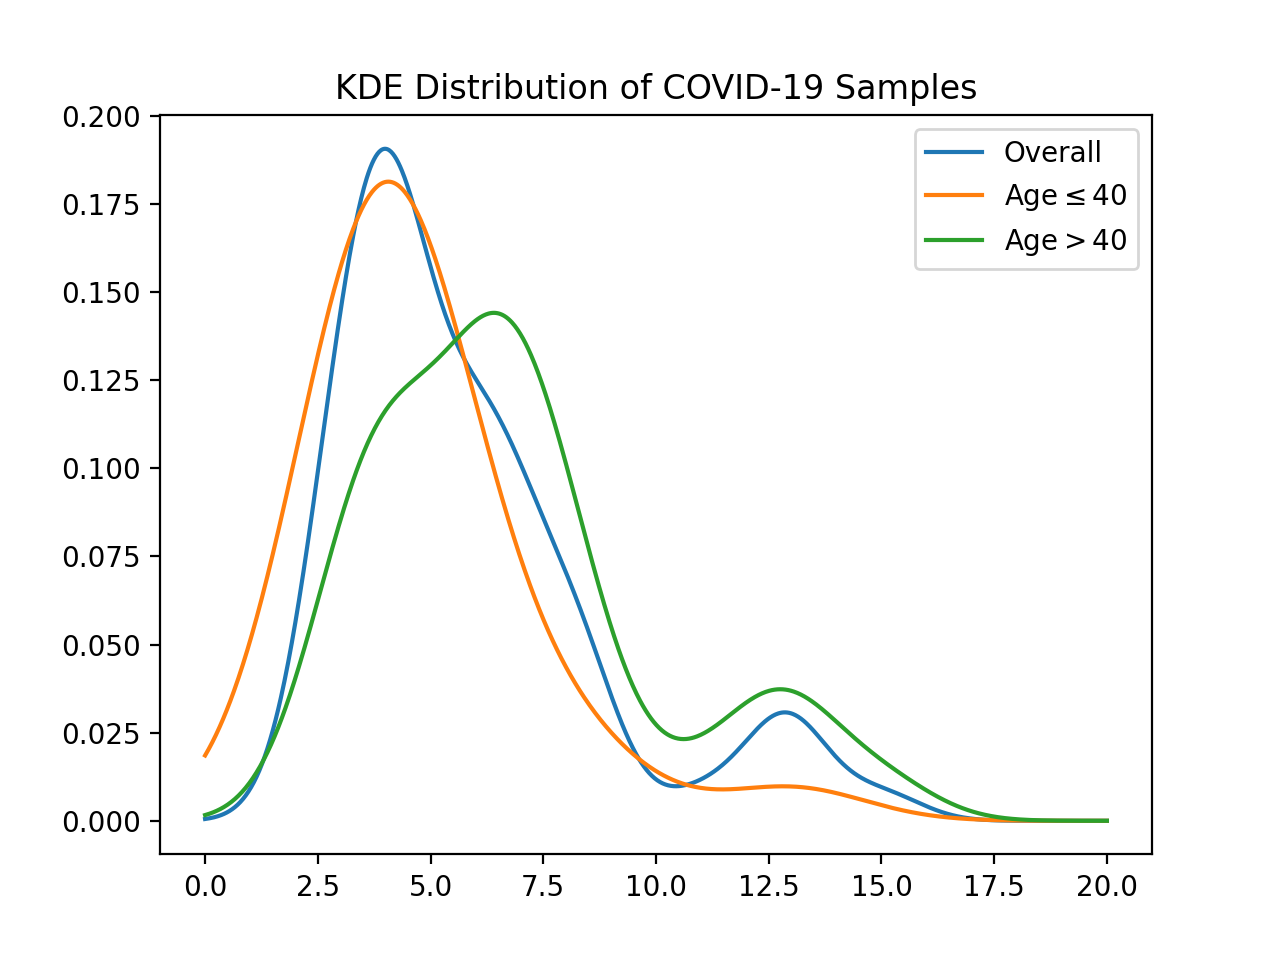

In [10]:
# Plot the three KDE distributions
x_d = np.linspace(0, 20, 1000)

log_prob_all = kde_all.score_samples(x_d[:, None])
log_prob_young = kde_young.score_samples(x_d[:, None])
log_prob_old = kde_old.score_samples(x_d[:, None])

fig = plt.figure()

plt.plot(x_d, np.exp(log_prob_all), label="Overall")
plt.plot(x_d, np.exp(log_prob_young), label=r"Age$\leq$40")
plt.plot(x_d, np.exp(log_prob_old), label=r"Age$>$40")

plt.title("KDE Distribution of COVID-19 Samples")
plt.legend()
plt.show();

**(c)**

The KDE distributions indicate that 
- Young individuals ($Age \leq 40$) has a shorter COVID-19 incubation on average than old inviduals ($Age > 40$).
- Young people have a peak incubation of about five days and old people have two peaks around 7 and 13 days.
- The variance of incubation days is larger in old group than that in young group.

### Problem 2

**(a)**

In [11]:
# Import and transpose the data
bq_data = np.loadtxt("data/BQ_probmat.txt", delimiter=",")

In [12]:
# Some diagnostics
print("Shape of BQ_probmat ", bq_data.shape)
print("Bequest distribution by income group: ", bq_data.sum(axis=0))
print("Sum of all probabilities: ", bq_data.sum())

Shape of BQ_probmat  (73, 7)
Bequest distribution by income group:  [0.01214584 0.00817072 0.01590964 0.0139963  0.01383075 0.06927237
 0.86667437]
Sum of all probabilities:  1.0000000000000002


<IPython.core.display.Javascript object>


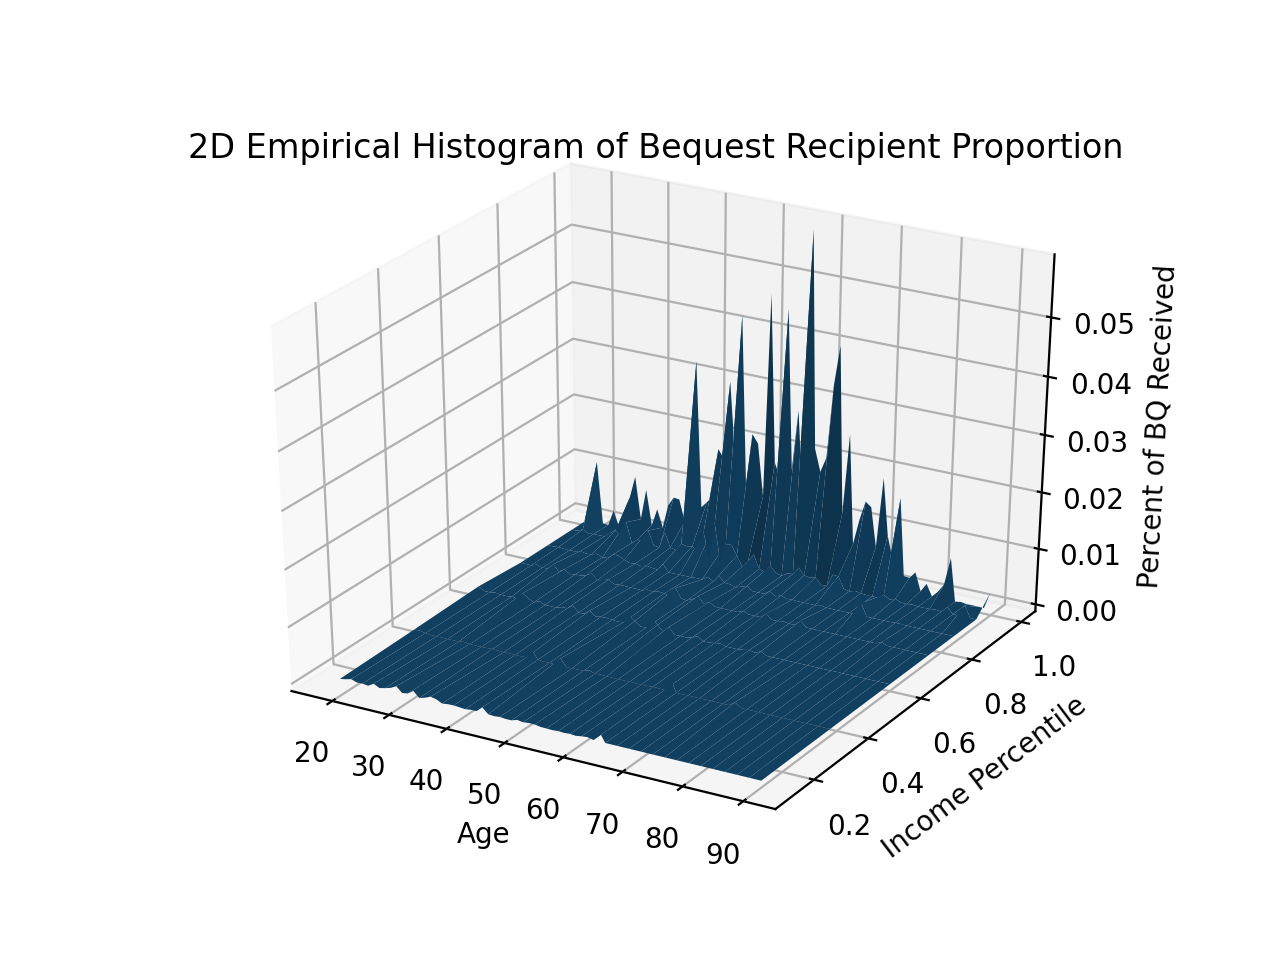

In [13]:
# Make 3D surface plot
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title("2D Empirical Histogram of Bequest Recipient Proportion")
ax.set_xlabel("Age")
ax.set_ylabel("Income Percentile")
ax.set_zlabel("Percent of BQ Received")
plt.show();

**(b)**

In [14]:
bq = pd.read_csv("data/BQ_ind_data.txt")
bq.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


<IPython.core.display.Javascript object>


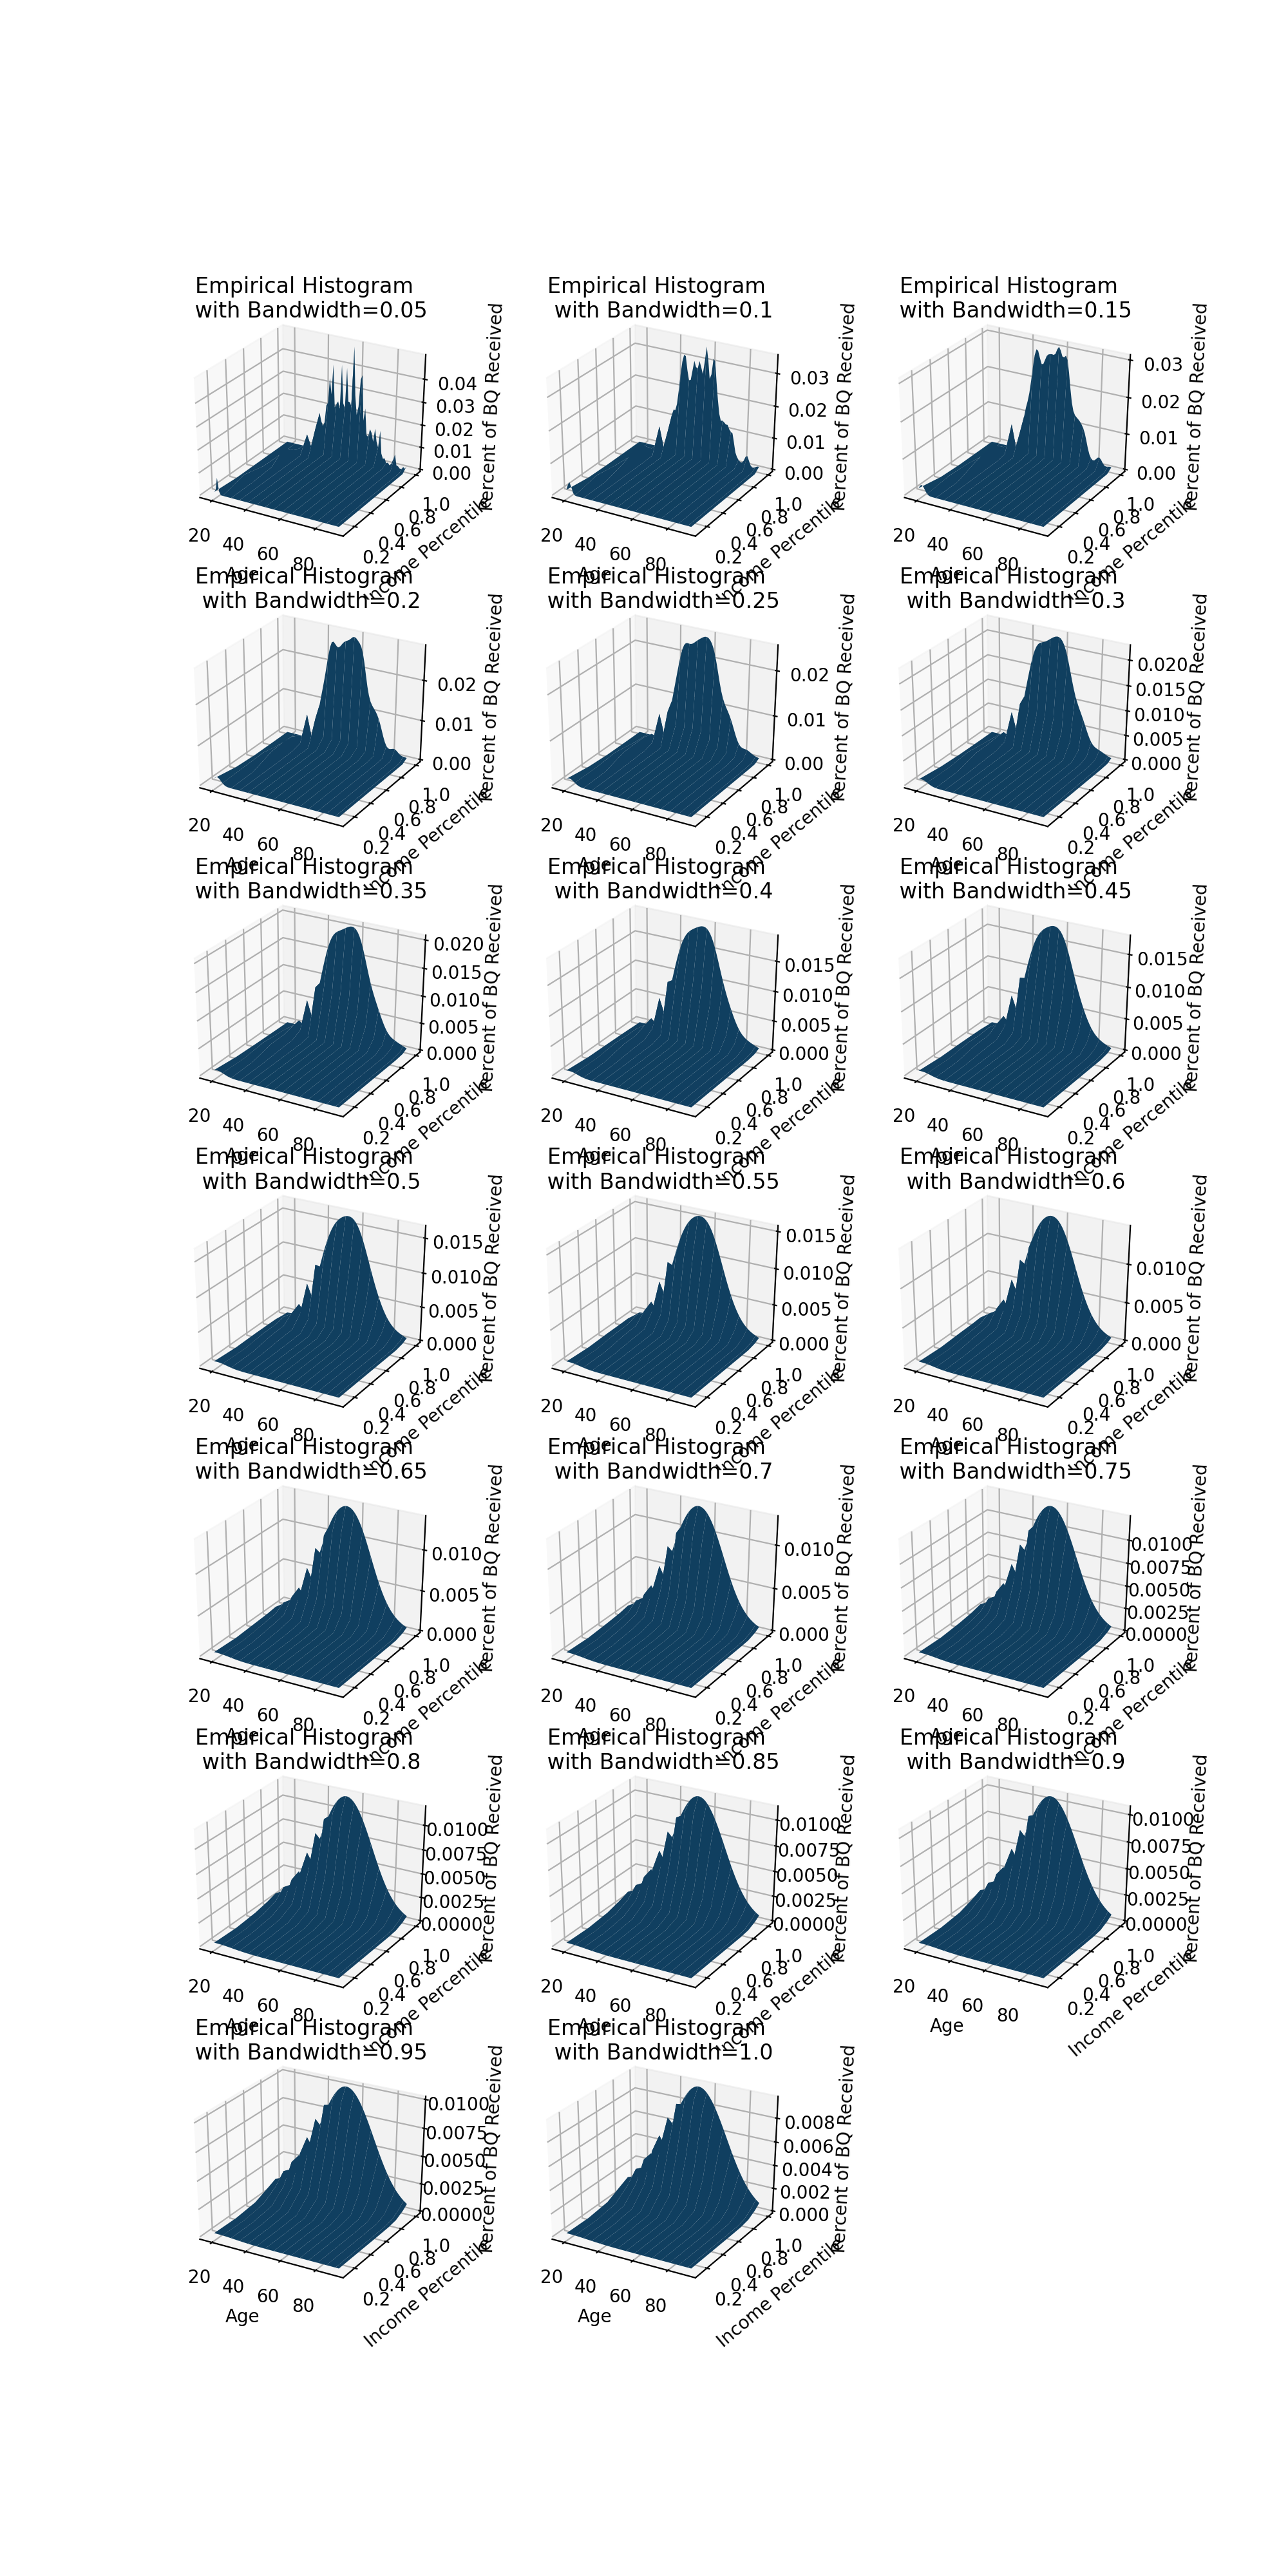

In [15]:
# Plot the 3D surface figure with different bandwidths
fig = plt.figure(figsize=(10, 20))
gs = fig.add_gridspec(7, 3)
coords = np.vstack([items.ravel() for items in [age_mat, income_mat]])

bandwidth = 0.0
for i in range(7):
    for j in range(3):
        bandwidth += 0.05
        kernel = gaussian_kde(bq.T, bw_method=bandwidth)
        
        Z = np.reshape(kernel(coords), age_mat.shape)
        Z_scaled = Z / float(np.sum(Z))
        
        ax = fig.add_subplot(gs[i, j], projection="3d")
        ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
        ax.set_xlabel("Age")
        ax.set_ylabel("Income Percentile")
        ax.set_zlabel("Percent of BQ Received")
        ax.set_title("Empirical Histogram \n with Bandwidth={}".format(round(bandwidth, 2), fontsize=5))
        
        if bandwidth >= 1:
            break
    if bandwidth >= 1:
        break

In terms of the income level, the bottom 80-90% of the people have a similar percentage of BQ received, whereas there is a sharp increase in the percentage of BQ received by the top 10-20% of the people. So we wish to fit such a pattern using a smaller bandwidth.

Regarding age, there is no violent fluctuation in the percentage of BQ received across all individuals of different ages. Hence, we want to fit the trend smoothly by choosing a relatively large bandwidth.

The figures above suggest that $\lambda=0.25$ might be appropriate to strike a balance between bias and variance.

<IPython.core.display.Javascript object>


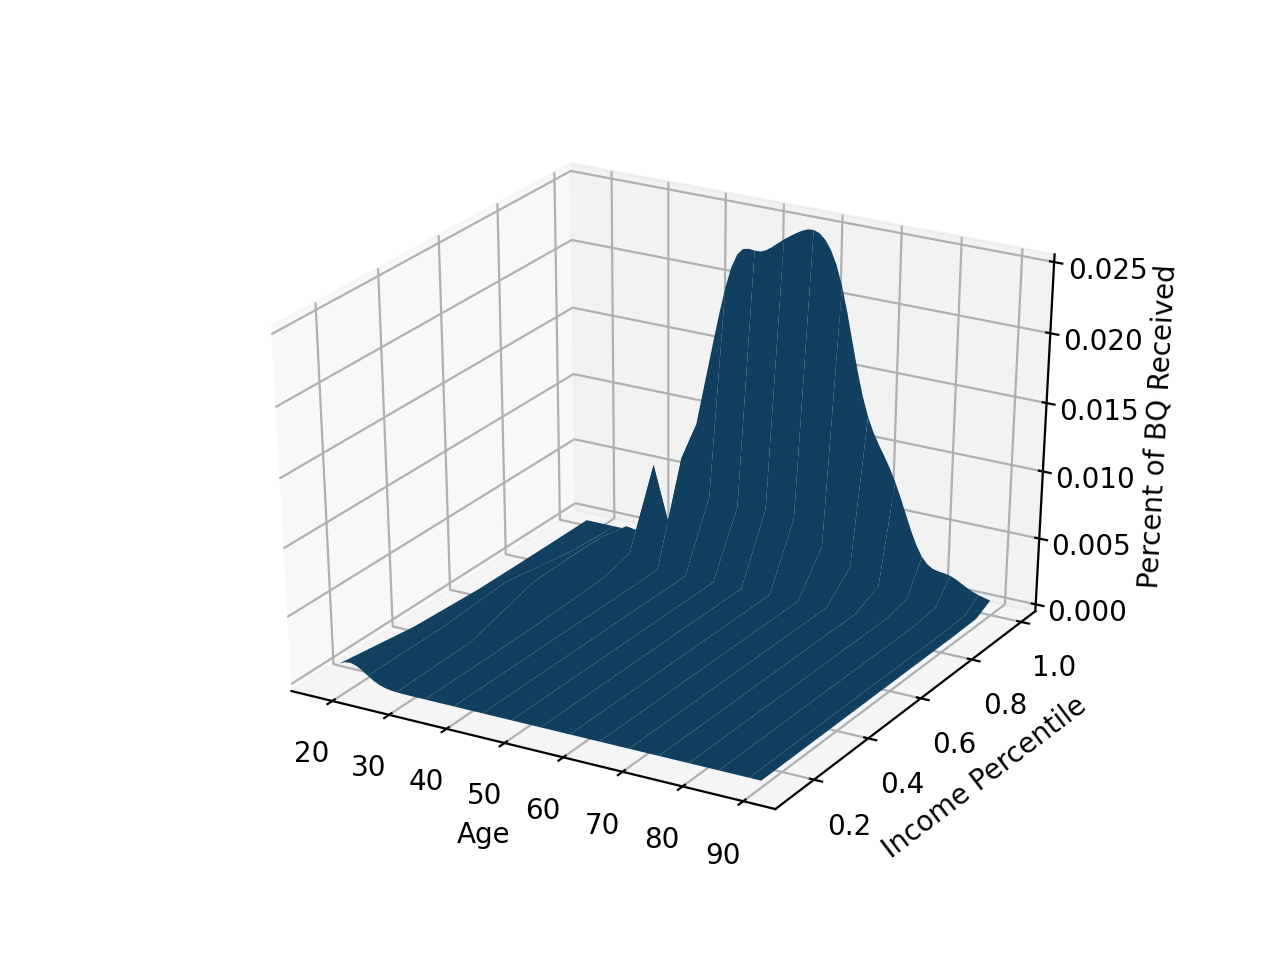

In [16]:
# Plot the 3D surface figure with bandwidth=0.25
bandwidth = 0.25
kernel = gaussian_kde(bq.T, bw_method=bandwidth)

coords = np.vstack([items.ravel() for items in [age_mat, income_mat]])
Z = np.reshape(kernel(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
ax.set_xlabel("Age")
ax.set_ylabel("Income Percentile")
ax.set_zlabel("Percent of BQ Received")
plt.show();

Cross validation verifies that $bandwidth=0.1$ is appropriate to strike a balance between bias and variance.

In [17]:
# Calculate the estimated density
print("The estimated density for bequest recipient who are aged 61 in the 6th life income category is {}."\
      .format(Z_scaled[61 - 18 + 1][5]))

The estimated density for bequest recipient who are aged 61 in the 6th life income category is 0.003360535254398306.
